# AIN 214 - PA1 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 03.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/


# Necessary Imports

In [174]:
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3
import matplotlib.pyplot as plt
import math

# Notes:
* Use pandas dataframe (df) to load the data. 
* Use numpy or pandas operations for the requested tasks unless otherwise specified. Use of naive for loops is not considered valid.
* For the db operations, use sqlite3 library in Python

# 1st Set of Questions on Boston Housing Dataset **(30 Pts)**

* Retrieved from KAGGLE
* **Dataset Path: "Data/BostonHousing.csv"**

## Q1. Basic Data Exploration **(10 Pts)**
1. Load the data into Pandas DataFrame and print the column names. **(1 pts)**
2. Display the first and last 10 rows of the dataset. **(1 pts)**
3. Display random 10 rows. **(1 pts)**
4. Display random 10 rows with a seed, ie, it outputs the same random rows everytime it is run. **(1 pts)**
5. Display every 15th row. **(1 pts)**
6. Get the summary stats of the dataset regarding each column. **(2 pts)**
7. Identify and count the number of missing values in each column. **(3 pts)**

In [175]:
# Load the data into Pandas DataFrame and print the column names
df = pd.read_csv(r"Data/BostonHousing.csv")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [176]:
# Display the first and last 10 rows of the dataset.
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [177]:
df.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [178]:
# Display the random 10 rows
df.sample(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73,24.4
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
245,0.19133,22.0,5.86,0,0.431,5.605,70.2,7.9549,7,330,19.1,389.13,18.46,18.5
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5


In [179]:
# sample using seed
seed = 1941

df.sample(n=10, random_state=seed)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,25.0
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80,18.4
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54,22.8


In [180]:
# Display every 15th row
df.iloc[::15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15,18.7
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [181]:
# Get the summary stats of the dataset regarding each column
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [182]:
# Identify and count the number of missing values in each column
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Q2. Data Filtering (10 pts)

1. Extract records where the rm (average number of rooms per dwelling) >= 7.   **(2 pts)**
2. Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.  **(2 pts)**
3. Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above the 75th percentile of the dataset. This would give neighborhoods with relatively larger homes, lower "lower-status" population percentage, and higher median values.  **(2 pts)**
4. Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox (nitric oxides concentration) is in the bottom 10%, indicating neighborhoods that are farther from employment centers and have cleaner air.  **(2 pts)**
5. From the houses built before 1940 (AGE column), select those which fall in the top 20% in terms of nitric oxide concentrations (NOX). From this subset, retrieve the bottom 10 records with the lowest MEDV values.  **(2 pts)**

In [183]:
# Extract records where the rm >= 7
df[df['rm']>=7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [184]:
# Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.
df[(df['chas']==1) & (df['crim']<df['crim'].median())]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
212,0.21719,0.0,10.59,1,0.4890,5.807,53.8,3.6526,4,277,18.6,390.94,16.03,22.4
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
218,0.11069,0.0,13.89,1,0.5500,5.951,93.8,2.8893,5,276,16.4,396.90,17.92,21.5
219,0.11425,0.0,13.89,1,0.5500,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
269,0.09065,20.0,6.96,1,0.4640,5.920,61.5,3.9175,3,223,18.6,391.34,13.65,20.7
273,0.22188,20.0,6.96,1,0.4640,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
276,0.10469,40.0,6.41,1,0.4470,7.267,49.0,4.7872,4,254,17.6,389.25,6.05,33.2


In [185]:
# Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above 
# the 75th percentile of the dataset. 

df[(df['lstat']<10)&(df['rm']>6)&(df['medv']>df['medv'].quantile(0.75))]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0


In [186]:
# Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox 
# (nitric oxides concentration) is in the bottom 10%
df[(df['medv']>df['medv'].quantile(0.9))&(df['nox']<df['medv'].quantile(0.1))]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0


In [187]:
# From the houses built before 1940 (age column), select those which fall in the top 20% in terms of nitric oxide concentrations (nox). From this subset,
# retrieve the bottom 10 records with the lowest medv values.

# Here, I took the year we are curently in (2023) as reference to calculate the age limit of the houses
ageLimit = 2023-1940
bef1940 = df[df['age']>ageLimit]
highnoxDf = bef1940[bef1940['nox']>bef1940['nox'].quantile(0.8)]
highnoxDf.nsmallest(10, 'medv')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
438,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02,8.4
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11,10.5
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
447,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,12.8
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1


## Q3. Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio). **(10 Pts)**
The ptratio is categorized into
* Low if ptratio <= 15
* Medium if 15 < ptratio <= 20
* High if ptratio > 20

In [188]:
#  Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio)
low_ptratio = df[df['ptratio']<=15]
med_ptratio = df[(df['ptratio']>15)&(df['ptratio']<=20)]
high_ptratio = df[df['ptratio']>20]

low_ptratio_crimerate = low_ptratio['crim'].sum()/len(low_ptratio['crim'])
med_ptratio_crimerate = med_ptratio['crim'].sum()/len(med_ptratio['crim'])
high_ptratio_crimerate = high_ptratio['crim'].sum()/len(high_ptratio['crim'])
print(low_ptratio_crimerate, med_ptratio_crimerate, high_ptratio_crimerate)

1.2355291379310345 0.15841587044534414 8.545539850746268


# 2nd Set of Questions on the shot1.csv and shot2.csv Datasets **(30 Pts)**

* **Dataset Path: "Data/shot1.csv" and "Data/shot2.csv"**

## Q1. Data Merging and Consistency Checking **(10 Pts)**

* Combine the data from "shot1.csv" and "shot2.csv" into a single DataFrame, ensuring no redundant columns are present. Merge by the redundant column names, representing the same info with different naming.
*  After merging, perform a consistency check for any duplicated rows and provide a summary of your findings. Give the details (avg, mean, etc) of each feature.

In [189]:
# read csv s into dfs 
shot_df = pd.read_csv(r"Data/shot1.csv")
shot_df2 = pd.read_csv(r"Data/shot2.csv")

In [190]:
# I displayed the columns to see the similarities of the two datasets
shot_df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'SHOT_RESULT'],
      dtype='object')

In [191]:
shot_df2.columns

Index(['GAME_IDENTIFICATION', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'],
      dtype='object')

In [192]:
#I checked if the game id columns have equal data (they do indeed)
if shot_df['GAME_ID'].equals(shot_df2['GAME_IDENTIFICATION']):
    print("Both DataFrames are identical.")
else:
    print("DataFrames are not identical.")

Both DataFrames are identical.


In [193]:
# I renamed the column before merging to make them the same, because they have equal data
shot_df2 = shot_df2.rename(columns={'GAME_IDENTIFICATION': 'GAME_ID'})
shot_df2

,GAME_ID,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [194]:
# merge dfs, removing redundant columns

# Here, for the sake of "removing redundant columns" I originally removed the columns that are unnecessary for our question set, like 'W' or 'LOCATION'.
# Then I decided to leave them as is, because I was doubtful about the requested output and didn't want to change the dataset subjectively.

columns = ('SHOT_DIST', 'SHOT_RESULT', 'GAME_ID')
merged_df = pd.merge(shot_df, shot_df2, on=columns)
merged_df


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,SHOT_RESULT,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127
2,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,7.7,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
3,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,7.7,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,missed,3,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174822,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,missed,2,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
174823,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,made,2,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
174824,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,made,2,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
174825,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,missed,2,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [195]:
# check for duplicate rows and provide a summary of the findings for each feature
duplicates = merged_df[merged_df.duplicated(keep=False)]
duplicates

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,SHOT_RESULT,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1883,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,20,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
1884,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,20,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
1885,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,21,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
1886,21400276,"DEC 05, 2014 - CHA vs. NYK",H,W,1,21,4,0:32,15.1,0,...,13.1,missed,2,"Stoudemire, Amar'e",2405,8.1,0,0,al jefferson,2744
3584,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,7,4,9:06,11.6,3,...,13.8,made,2,"Green, Erick",203475,3.0,1,2,gary neal,202390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170069,21400385,"DEC 19, 2014 - MIN @ BOS",A,L,-16,17,4,3:58,6.0,1,...,4.1,missed,2,"Sullinger, Jared",203096,2.6,0,0,thaddeus young,201152
171949,21400421,"DEC 23, 2014 - BKN vs. DEN",H,W,6,13,4,1:31,4.0,2,...,8.1,missed,2,"Faried, Kenneth",202702,2.1,0,0,mason plumlee,203486
171950,21400421,"DEC 23, 2014 - BKN vs. DEN",H,W,6,13,4,1:31,4.0,2,...,8.1,missed,2,"Faried, Kenneth",202702,2.1,0,0,mason plumlee,203486
171951,21400421,"DEC 23, 2014 - BKN vs. DEN",H,W,6,14,4,1:31,4.0,2,...,8.1,missed,2,"Faried, Kenneth",202702,2.1,0,0,mason plumlee,203486


In [196]:
merged_df.drop_duplicates(inplace=True)

In [197]:
#gives number of same values in each column/feature
for col in merged_df.columns:
    identical_counts = len(merged_df) - merged_df[col].nunique()
    print(col, identical_counts)


GAME_ID 173849
MATCHUP 172945
LOCATION 174751
W 174751
FINAL_MARGIN 174665
SHOT_NUMBER 174715
PERIOD 174746
GAME_CLOCK 174034
SHOT_CLOCK 174512
DRIBBLES 174720
TOUCH_TIME 174440
SHOT_DIST 174305
SHOT_RESULT 174751
PTS_TYPE 174751
CLOSEST_DEFENDER 174280
CLOSEST_DEFENDER_PLAYER_ID 174279
CLOSE_DEF_DIST 174454
FGM 174751
PTS 174750
player_name 174472
player_id 174472


In [198]:
#details for each feature
merged_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.747530e+05,174753.000000,174753.000000,174753.000000,167349.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000
mean,2.140045e+07,0.213496,6.527825,2.475122,12.567087,1.956544,2.700657,13.653505,2.290839,158910.239166,4.170358,0.447197,0.986924,157527.022214
std,2.567926e+02,13.150768,4.725423,1.140989,5.776279,3.438927,3.003756,9.073395,0.454151,78825.178909,2.814585,0.497205,1.130234,79198.232583
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140024e+07,-8.000000,3.000000,1.000000,8.300000,0.000000,0.800000,4.400000,2.000000,101187.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.400000,0.000000,1.500000,14.000000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.800000,2.000000,3.600000,23.000000,3.000000,203078.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## Q2. Player’s Shooting Accuracy Analysis **(10 Pts)**
* Using the combined DataFrame from Question 1, calculate and display the shooting accuracy of each player. 
* Shooting accuracy = the ratio of successful shots (SHOT_RESULT) to total shots taken
* Display the top 5 players based on shooting accuracy

In [199]:
# dictionary to hold each unique player's id and success ratio
winRatioDict = {}
topfive = ()
idGroup = merged_df.groupby('player_id')
for id, group in idGroup:
    count = (group['SHOT_RESULT'] == 'made').sum()
    ratio = count / len(group)
    winRatioDict[id] = ratio
values = [i for i in winRatioDict.values()]
values.sort()
values.reverse()
values[:5]
for val in values[:5]:
    for key, value in winRatioDict.items():
        if value == val:
            name = merged_df[merged_df['player_id'] == key]['player_name'].values[0]
            print(name)

deandre jordan
tyson chandler
rudy gobert
greg smith
james johnson


## Q3. Analyze the Relationship between shooting distance (SHOT_DIST) and shooting success (SHOT_RESULT). **(10 Pts)**
* Bin the shots into categories based on distance. **STATE AND REASON ABOUT YOUR LOGIC HERE!** (How to apply binning)
* Calculate the shooting accuracy for each bin. 
* **COMMENT** on your findinds.

In [200]:
# found the range of the data
lowest_value = merged_df['SHOT_DIST'].min()
highest_value = merged_df['SHOT_DIST'].max()
print(lowest_value,highest_value)

0.0 47.2


In [201]:
# decided to take square root of the range of the data come up with the amount of bins to use
bin_length = highest_value-lowest_value
bin_number = math.ceil(math.sqrt(bin_length))  #bin_number == 7
bin_number


7

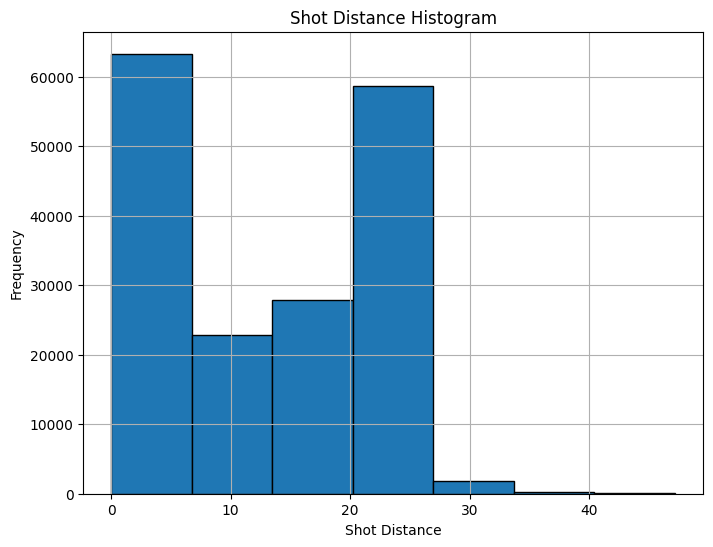

In [202]:
# I wanted to visualize the bins to make sure the bin number that I selected was okay
plt.figure(figsize=(8, 6))
plt.hist(merged_df['SHOT_DIST'], bins=bin_number, edgecolor='black')
plt.title('Shot Distance Histogram')
plt.xlabel('Shot Distance')
plt.ylabel('Frequency')
plt.grid(True) 
plt.show()

In [203]:
bin_gap = math.ceil(bin_length/bin_number)
bin_gap

7

In [204]:
labelList = []
for i in range(bin_number):
    labelList.append(f'{lowest_value + i * bin_gap}-{lowest_value + (i + 1) * bin_gap}')
labelList

['0.0-7.0',
 '7.0-14.0',
 '14.0-21.0',
 '21.0-28.0',
 '28.0-35.0',
 '35.0-42.0',
 '42.0-49.0']

In [205]:
# I added the labels of the bins to the dataframe
bin_edges = [lowest_value + i * bin_gap for i in range(bin_number)] + [lowest_value + bin_number * bin_gap]
merged_df['Bin_Label'] = pd.cut(merged_df['SHOT_DIST'], bins=bin_edges, labels=labelList, include_lowest=True)
merged_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_RESULT,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,Bin_Label
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,7.0-14.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127,7.0-14.0
2,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,made,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,7.0-14.0
3,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,...,made,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127,7.0-14.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,missed,3,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,28.0-35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174822,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,missed,2,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127,7.0-14.0
174823,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,made,2,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127,0.0-7.0
174824,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,made,2,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127,14.0-21.0
174825,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,missed,2,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127,14.0-21.0


In [206]:
# dictionary to hold label as key and the success ratio as value, amount of shots that are made divided by total bin length (of the spesific bin) gives the ratio
bin_successDict = {}
for label in labelList:
    successNum = len(merged_df[(merged_df['Bin_Label']==label)&(merged_df['SHOT_RESULT']=='made')])
    successRatio = successNum/len(merged_df[merged_df['Bin_Label']==label])
    bin_successDict[label] = successRatio
bin_successDict

{'0.0-7.0': 0.6023935558112773,
 '7.0-14.0': 0.3883812595180507,
 '14.0-21.0': 0.3927729772191673,
 '21.0-28.0': 0.32458585894922387,
 '28.0-35.0': 0.18661971830985916,
 '35.0-42.0': 0.050761421319796954,
 '42.0-49.0': 0.037037037037037035}

# 3rd Set of Questions on SQL - **using sqlite3 library!** **(40 Pts)**

* **Dataset Path: "Data/annots.csv"**

Here you are given a file: annots.csv, with the protein - gene ontology (GO) term associations/annotations. Gene ontology is a framework, representing the properties of genes and proteins. This is basically a Graph - more spesifically a directed acyclic graph (DAG), representing a level-ordered hierarchy with three subgraphs: MF, CC, and BP. Here, **each** node in the graph, which we term as **"GO Term" corresponds to a function of a protein.**

* If protein is annotated with a GO Term, then the protein has the function represented by this GO Term. 
* A protein can be and most of the time is annotated with multiple GO terms, and vice versa. 

In the annots.csv file, we have the annotation data, where each row corresponds to a protein - GO term annotation with the following columns: ProteinID,ProtSeq, GO_ID, Sub_Graph, Level. ProteinID is the specifier of the protein and the ProtSeq is the aminoacid sequence of this protein. GO_ID, Sub_Graph, and Level are properties of a GO Term. 

**Now, we want to store this data in a relational database, with the following table schemas:**

## Table 1: GoTerms:

| Column   | Type    | Key        | Description                |
|----------|---------|------------|----------------------------|
| GoID     | TEXT    | PRIMARY KEY| Gene Ontology Identifier   |
| SubGraph | TEXT    |            | Subgraph Type (BP, MF, CC) |
| Level    | INTEGER |            | Ontology level             |


## Table 2: Proteins

| Column     | Type | Key        | Description                |
|------------|------|------------|----------------------------|
| ProteinID  | TEXT | PRIMARY KEY| Unique Protein Identifier  |
| ProtSeq  | TEXT | | Amino Acid Sequence |

## Table 3: Annotations

| Column    | Type | Key                       | Description               |
|-----------|------|---------------------------|---------------------------|
| GoID      | TEXT | PRIMARY KEY, FOREIGN KEY  | Gene Ontology Identifier  |
| ProteinID | TEXT | PRIMARY KEY, FOREIGN KEY  | Unique Protein Identifier |


## Q1. Read the csv file and create this DB  **(10 Pts)**

In [207]:
# read file into db and create a db using sqlite3
import csv
# created a database
connection = sqlite3.connect('mydatabase.db')
cursor = connection.cursor()
# created the tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS GoTerms (
        GoID TEXT UNIQUE,
        SubGraph TEXT,
        Level INTEGER
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Proteins (
        ProteinID TEXT PRIMARY KEY,
        ProtSeq TEXT
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Annotations (
        GoID TEXT,
        ProteinID TEXT,
        PRIMARY KEY (GoID, ProteinID),
        FOREIGN KEY (GoID) REFERENCES GoTerms(GoID),
        FOREIGN KEY (ProteinID) REFERENCES Proteins(ProteinID)
    )
''')
cursor.execute('DELETE FROM GoTerms WHERE rowid NOT IN (SELECT MIN(rowid) FROM GoTerms GROUP BY GoID)')
with open('Data/annots.csv', 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # if there is a header row, skip it
    for row in csv_reader:
        protein_id, prot_seq, go_id, sub_graph, level = row
        # insert data into the proteins, goterms and annotations tables
        cursor.execute('INSERT OR IGNORE INTO Proteins (ProteinID, ProtSeq) VALUES (?, ?)', (protein_id, prot_seq))
        cursor.execute('INSERT OR IGNORE INTO GoTerms (GoID, SubGraph, Level) VALUES (?, ?, ?)', (go_id, sub_graph, level))
        cursor.execute('INSERT OR IGNORE INTO Annotations (GoID, ProteinID) VALUES (?, ?)', (go_id, protein_id))   
connection.commit()

In [208]:
display(pd.read_sql('''
SELECT *
FROM Proteins
''', connection))

display(pd.read_sql('''
SELECT *
FROM GoTerms
''', connection))

display(pd.read_sql('''
SELECT *
FROM Annotations
''', connection))

,ProteinID,ProtSeq
0,A0A0E4AZF8,VDDIQEKMNKELGCIKVTFPGADGQGEDACLKDIPVSLISTYFART...
1,A0A075B6K5,FDEAEHAHTYLRERIEVRLMTASESLMGERLGLMMGVCYEHFKGCG...
2,A0A097ZPG2,NCLLPFHFDGRQPFWTGADCMFAFLMCDYSGAMCECTGCHWPHQEG...
3,A0A097ZPD9,QFEGITCPMDPCRPCAWWIARYSYHWLPIHRGSECQGLYMKPPDYQ...
4,A0A0C4DH36,GNGGHVTILYAYGAMHRHQMVRCYHWVGVTRV
...,...,...
995,A0A023PZA9,NIEIQLYARLSFFQCMCPGWNTHRLGDHHRPCAAVYEQIKEHDV
996,A0A0D2YG06,SELCMFIYCACPQDMTAMQAKAMKEKEVQSAMVWVEDSLGIISHHK...
997,A0A023PZF2,DDPHSTSDEMYHGMCEPKMVANYWELVWCNYNGDEGQKGPDGSYLF...
998,A0A023PYI5,LNHPEMCCMMNFQSVPWPMPQSTRGGHWVCIYSVILWGC


,GoID,SubGraph,Level
0,GO:0005488,MF,1
1,GO:0019814,CC,2
2,GO:0004499,MF,5
3,GO:0006629,BP,3
4,GO:0002250,BP,3
...,...,...,...
2833,GO:0060297,BP,6
2834,GO:0006656,BP,5
2835,GO:0071864,BP,6
2836,GO:2000106,BP,6


,GoID,ProteinID
0,GO:0005488,A0A0E4AZF8
1,GO:0019814,A0A075B6K5
2,GO:0004499,A0A097ZPG2
3,GO:0006629,A0A097ZPD9
4,GO:0002250,A0A0C4DH36
...,...,...
25539,GO:0008152,A0A0D1DT68
25540,GO:0000322,A0A075TR33
25541,GO:0010035,A0A0B7P9G0
25542,GO:0017171,A0A024B7W1


## Q2. Define a function to extract all GO terms associated with a given amino acid sequence (ProtSeq), ensuring that the GO terms satisfy the following criteria: they are annotated with at least 50 proteins in MF and CC subgraphs, and 100 proteins in the BP subgraph.. **(10 Pts)**

In [209]:
prot_seq = "WYTWADEAHAKNIVMCFRMHGEAYEKAAVYMNRSPEFMGCRADNNDEYDV" #example protein sequence
# function to extract the annotated GO terms with the above specs

# this function returns the goterms table of the protein if it's annotated by enough subgraphs (it takes these limits as parameters)
def extract_go_terms(prot_seq, mf_limit, cc_limit, bp_limit):
    go_terms = []
    query = """
        SELECT GoTerms.*
        FROM GoTerms
        JOIN Proteins ON Proteins.ProteinID = Annotations.ProteinID
        JOIN Annotations ON GoTerms.GoID = Annotations.GoID
        WHERE Proteins.ProtSeq = ?
        GROUP BY GoTerms.GoID
        HAVING COUNT(CASE WHEN GoTerms.SubGraph = 'MF' THEN 1 ELSE 0 END) >?
        AND COUNT(CASE WHEN GoTerms.SubGraph = 'CC' THEN 1 ELSE 0 END) >?
        AND COUNT(CASE WHEN GoTerms.SubGraph = 'BP' THEN 1 ELSE 0 END) >?;
    """
    cursor.execute(query, (prot_seq, mf_limit, cc_limit, bp_limit))
    result = cursor.fetchall()
    return result

print(extract_go_terms(prot_seq, 0, 0, 0))

[('GO:0003674', 'MF', 0), ('GO:0003824', 'MF', 1), ('GO:0004497', 'MF', 3), ('GO:0005488', 'MF', 1), ('GO:0005506', 'MF', 6), ('GO:0005575', 'CC', 0), ('GO:0006629', 'BP', 3), ('GO:0006720', 'BP', 4), ('GO:0006721', 'BP', 5), ('GO:0008150', 'BP', 0), ('GO:0008152', 'BP', 1), ('GO:0008299', 'BP', 4), ('GO:0008610', 'BP', 4), ('GO:0009058', 'BP', 2), ('GO:0009987', 'BP', 1), ('GO:0016020', 'CC', 2), ('GO:0016101', 'BP', 6), ('GO:0016102', 'BP', 6), ('GO:0016114', 'BP', 5), ('GO:0016491', 'MF', 2), ('GO:0016705', 'MF', 3), ('GO:0016712', 'MF', 4), ('GO:0020037', 'MF', 4), ('GO:0043167', 'MF', 2), ('GO:0043169', 'MF', 3), ('GO:0044237', 'BP', 2), ('GO:0044238', 'BP', 2), ('GO:0044249', 'BP', 3), ('GO:0044255', 'BP', 3), ('GO:0046872', 'MF', 4), ('GO:0046906', 'MF', 3), ('GO:0046914', 'MF', 5), ('GO:0071704', 'BP', 2), ('GO:0097159', 'MF', 2), ('GO:0110165', 'CC', 1), ('GO:1901363', 'MF', 2), ('GO:1901576', 'BP', 3)]


## Q3. Print the averge number of annotations a GO terms has for each level in each subgraph (MF, CC, and BP) **(10 Pts)**

In [210]:
# Print the avg # of annots
print("Average annotation for each subgraph and level:")
subgraphs = ['MF', 'CC', 'BP']
for subgraph in subgraphs:
    # SQL query to calculate the average number of annotations per level in the specified SubGraph
    query = f'''
    SELECT Level, AVG(AnnotationsPerGO) AS AvgAnnotations
    FROM (
        SELECT G.GoID, Level, COUNT(DISTINCT A.ProteinID) AS AnnotationsPerGO
        FROM GoTerms AS G
        LEFT JOIN Annotations AS A ON G.GoID = A.GoID
        WHERE G.SubGraph = ?
        GROUP BY G.GoID, Level
    ) AS Subquery
    GROUP BY Level;
    '''
    cursor.execute(query, (subgraph,))
    averages = cursor.fetchall()
    for level, average in averages:
        print(f"Subgraph {subgraph} - Level {level}: {average:.2f}")


Average annotation for each subgraph and level:
Subgraph MF - Level 0: 815.00
Subgraph MF - Level 1: 75.60
Subgraph MF - Level 2: 36.66
Subgraph MF - Level 3: 10.76
Subgraph MF - Level 4: 6.27
Subgraph MF - Level 5: 3.90
Subgraph MF - Level 6: 2.37
Subgraph MF - Level 7: 1.86
Subgraph MF - Level 8: 1.00
Subgraph CC - Level 0: 691.00
Subgraph CC - Level 1: 278.33
Subgraph CC - Level 2: 26.87
Subgraph CC - Level 3: 14.60
Subgraph CC - Level 4: 9.02
Subgraph CC - Level 5: 5.05
Subgraph CC - Level 6: 2.78
Subgraph CC - Level 7: 2.14
Subgraph CC - Level 8: 1.33
Subgraph CC - Level 9: 1.33
Subgraph BP - Level 0: 810.00
Subgraph BP - Level 1: 85.63
Subgraph BP - Level 2: 25.81
Subgraph BP - Level 3: 10.09
Subgraph BP - Level 4: 5.05
Subgraph BP - Level 5: 3.23
Subgraph BP - Level 6: 2.30
Subgraph BP - Level 7: 1.71
Subgraph BP - Level 8: 1.71
Subgraph BP - Level 9: 1.40
Subgraph BP - Level 10: 1.00
Subgraph BP - Level 11: 1.00


## Q4. Identify the ProteinID with the longest ProtSeq within the Proteins table. Modify its ProtSeq to half its original length by trimming the sequence, update the ProteinID to "trimmed", and display the updated ProteinID and ProtSeq with its GO Term annotations. **(10 Pts)**

In [211]:
# find and trim the longest sequence, displaying the updated ProtID and ProtSeq, and its annotated GO Terms
protid_query = '''
SELECT ProteinID
FROM Proteins
ORDER BY LENGTH(ProtSeq) DESC
LIMIT 1;
'''
cursor.execute(protid_query)
protid = cursor.fetchone()  #ProteinID with the longest ProtSeq
protid[0]


'A0A026W182'

In [212]:
# longest protseq
for protein_id in protid:
    protseq_query = '''
    SELECT ProtSeq
    FROM Proteins
    WHERE ProteinID = ?;
    '''
    cursor.execute(protseq_query, (protein_id,))
    result = cursor.fetchone()
result

('PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQNHLPESIRGGCSARGGPKLIDYVFHYHFWEDNLATM',)

In [213]:
#trimmed the longest protseq by half
trimmed_protseq = result[0][:len(result[0]) // 2]
trimmed_protseq

'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN'

In [214]:
#updated the table with the trimmed protseq
trim_query = '''
UPDATE Proteins
SET ProtSeq = ?
WHERE ProteinID = ?;
'''
cursor.execute(trim_query, (trimmed_protseq, protein_id))
# displayed the goterms of that protein
queryyyy = '''
SELECT GoID
FROM Annotations
WHERE ProteinID = ?
'''
cursor.execute(queryyyy, (protid[0], ))
goidd = cursor.fetchall()
goterm_df = pd.read_sql('SELECT * FROM GoTerms', connection)
goterm_dfs = []
for id in goidd:
    goterm_dfs.append(goterm_df[goterm_df['GoID'] == id[0]])
finalDf = pd.concat(goterm_dfs, ignore_index=True)
finalDf


,GoID,SubGraph,Level
0,GO:0051716,BP,2
1,GO:0003008,BP,2
2,GO:0050907,BP,4
3,GO:0050877,BP,3
4,GO:0048736,BP,3
5,GO:0023052,BP,3
6,GO:0005549,MF,2
7,GO:0043695,BP,4
8,GO:0048856,BP,2
9,GO:0009987,BP,1


# PLAGIARISM
All work on assignments must be done individually. You are encouraged to discuss
the given assignments with your classmates, but these discussions should be carried out
in an abstract way. That is, discussions related to a particular solution to a specific prob-
lem (either in actual code or in pseudocode) will not be tolerated. In short, turning
in someone else’s work (including work available on the internet), in whole or in part, as
your own will be considered as a violation of academic integrity. Please note that the
former conditions also hold for the material attained using AI tools, including ChatGPT,
GitHub Copilot, etc.